In [1]:
import librosa
import librosa.display
from librosa.core import load
import numpy as np
import pandas as pd
import glob
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Visualize LDA results
def plot_LDA_or_PCA(df_lda,y_label,col1,col2,type):
    df_lda['target'] = y_label
    plt.figure(figsize=(8,6))
    emo_or_sti = 'Emotion' if len(np.unique(y_label)) > 3 else 'Sentiment' 
    for label in np.unique(y_label):
        plt.scatter(df_lda[df_lda['target']==label][col1], 
                    df_lda[df_lda['target']==label][col2], 
                    label=label,s=5)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.title(f'{type} Visualization {emo_or_sti} ')
    plt.show()

### Load Data

In [3]:
VERSION = 4 
df_joint_train = pd.read_csv(f'./features/cache_all_features_train_V{VERSION}.csv')
feature_column_names = [i for i in df_joint_train.columns \
                        if i not in ['file_path','renamed_file_path','split','sentiment_value','emotional_category']]

df_joint_test = pd.read_csv(f'./features/cache_all_features_test_V{VERSION}.csv')
print("df_joint_train shape: ", df_joint_train.shape)
print("df_joint_test shape: ", df_joint_test.shape)

feat_rank_emo = pd.read_csv('./features/relationship_stats_test_result_emotion_all_V4.csv')
feat_rank_sti = pd.read_csv('./features/relationship_stats_test_result_sentiment_all_V4.csv')
feat_rank_emo.correlation_coeff = abs(feat_rank_emo.correlation_coeff)
feat_rank_sti.correlation_coeff = abs(feat_rank_sti.correlation_coeff)
feature_types = ['mfcc','chroma','mel','zcr','rms','Intensity','Pitch','GNE','HNR','Spectrum','Formant']

df_joint_train shape:  (10981, 1550)
df_joint_test shape:  (1180, 1550)


In [18]:
X_train = df_joint_train[feature_column_names]
y_train_s = df_joint_train['sentiment_value']
y_train_e = df_joint_train['emotional_category']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_e_num = label_encoder.fit_transform(y_train_e)

X_test = df_joint_test[feature_column_names]
y_test_s = df_joint_test['sentiment_value']
y_test_e = df_joint_test['emotional_category']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_e_num = label_encoder.fit_transform(y_test_e)

### Check feature ranking

In [4]:
feat_rank_emo.describe()

,p_value,is_significant,f_score,correlation_coeff,mutual_info_score
count,1546.00000,1546.000000,1546.000000,1546.000000,1546.000000
mean,0.00013,0.999353,79.626271,0.113689,0.145012
std,0.00216,0.025433,83.848850,0.064382,0.064789
min,0.00000,0.000000,1.989100,0.000300,0.004300
25%,0.00000,1.000000,28.025975,0.058900,0.094050
50%,0.00000,1.000000,60.002250,0.113300,0.151750
75%,0.00000,1.000000,105.034900,0.160200,0.204300
max,0.05270,1.000000,876.182000,0.400300,0.307400


In [19]:
features_score_above_p50 = feat_rank_emo[(feat_rank_emo.f_score>60) &
(feat_rank_emo.mutual_info_score>0.15)&
(feat_rank_emo.correlation_coeff>0.11)]['feature'].values

print("features with score above p50 from Emotion label: ", len(features_score_above_p50))
print(features_score_above_p50)

features with score above p50 from Emotion label:  466
['mfcc_p90_1' 'Intensity_max_intensity' 'Intensity_q3_intensity'
 'mfcc_median_1' 'mfcc_mean_1' 'Spectrum_band_energy_difference'
 'Spectrum_band_density_difference' 'rms_std' 'Pitch_mean_pitch'
 'mfcc_p10_3' 'mfcc_std_1' 'rms_p90' 'Formant_f1_median'
 'Pitch_median_intensity' 'mfcc_mean_3' 'Pitch_q1_pitch' 'rms_mean'
 'mfcc_std_19' 'mfcc_std_21' 'rms_median' 'mfcc_std_20' 'Pitch_min_pitch'
 'mfcc_std_24' 'Intensity_median_intensity' 'mfcc_std_22'
 'Spectrum_center_of_gravity_spectrum' 'zcr_median' 'GNE_sum_gne'
 'GNE_mean_gne' 'mel32_std_22' 'mel64_std_43' 'mel32_std_23'
 'mel32_std_21' 'mel32_mean_22' 'mel32_mean_21' 'mel32_std_26'
 'mel32_mean_26' 'mel64_mean_42' 'mel32_mean_23' 'mel64_std_42'
 'mel64_mean_43' 'mel32_std_25' 'mel32_mean_20' 'mel32_mean_24'
 'mel128_mean_84' 'mel32_std_24' 'mel64_mean_51' 'mel128_std_85'
 'mel32_std_20' 'mel32_mean_25' 'mel128_std_84' 'mel64_std_46'
 'mel64_mean_46' 'mel64_std_51' 'mel64_std_41' 

In [5]:
feat_rank_emo[feat_rank_emo.feature.str.contains('pitch')]

,feature,p_value,is_significant,f_score,correlation_coeff,mutual_info_score
2,Pitch_pitch_slope_without_octave_jumps,0.0,1,756.2722,0.0610,0.1888
9,Pitch_q3_pitch,0.0,1,486.9693,0.0804,0.2173
10,Pitch_mean_pitch,0.0,1,474.9486,0.1277,0.2180
12,Pitch_mean_absolute_pitch_slope,0.0,1,458.2618,0.0704,0.1425
20,Pitch_q1_pitch,0.0,1,369.6490,0.1797,0.2066
31,Pitch_stddev_pitch,0.0,1,316.3860,0.0627,0.1463
42,Pitch_min_pitch,0.0,1,288.2170,0.1438,0.1891
64,Pitch_max_pitch,0.0,1,237.3622,0.0223,0.1799
971,Pitch_relative_min_pitch_time,0.0,1,44.2245,0.0097,0.0736
1217,Pitch_relative_max_pitch_time,0.0,1,21.4184,0.0145,0.0962


In [7]:
feat_rank_sti.describe()

,p_value,is_significant,f_score,correlation_coeff,mutual_info_score
count,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000
mean,0.011053,0.961190,53.687398,0.043609,0.036666
std,0.067890,0.193204,87.779360,0.036368,0.019041
min,0.000000,0.000000,0.082700,0.000000,0.000000
25%,0.000000,1.000000,14.283200,0.018300,0.020525
50%,0.000000,1.000000,31.134600,0.035300,0.035900
75%,0.000000,1.000000,51.957600,0.058775,0.050475
max,0.920600,1.000000,1290.238400,0.301000,0.115000


In [11]:
features_score_above_p75 = feat_rank_sti[(feat_rank_sti.f_score>52) & 
(feat_rank_sti.correlation_coeff>0.058) & 
(feat_rank_sti.mutual_info_score>0.05)]['feature'].values 

print("features with score above p75 from Sentiment label: ", len(features_score_above_p75))
print(features_score_above_p75)

features with score above p75 from Sentiment label:  68
['Pitch_pitch_slope_without_octave_jumps' 'Pitch_stddev_pitch'
 'Pitch_mean_absolute_pitch_slope' 'Pitch_q3_pitch' 'mfcc_median_33'
 'Pitch_mean_pitch' 'mfcc_mean_33' 'mfcc_median_34' 'mfcc_median_32'
 'Pitch_max_pitch' 'Pitch_median_intensity' 'mfcc_std_21' 'mfcc_mean_32'
 'mfcc_mean_34' 'mfcc_std_22' 'mfcc_std_27' 'mfcc_std_24' 'mfcc_std_23'
 'mfcc_std_20' 'mfcc_p90_22' 'mfcc_std_17' 'mfcc_std_19' 'mfcc_p90_33'
 'Intensity_q3_intensity' 'mfcc_p90_25' 'mfcc_std_18' 'mfcc_std_1'
 'Pitch_min_pitch' 'mel32_std_22' 'mel32_std_23' 'Local Jitter'
 'mel64_std_43' 'mel32_mean_22' 'mel32_mean_23' 'mel64_mean_46'
 'mel64_p10_3' 'mel32_mean_24' 'mel32_std_12' 'mel64_mean_43'
 'mel64_std_42' 'mel64_std_44' 'mel64_mean_42' 'mel32_std_9'
 'mel128_mean_91' 'mel64_mean_44' 'mel32_p90_24' 'mel128_std_84'
 'mel128_mean_84' 'mel64_mean_45' 'mel64_mean_48' 'mel64_std_45'
 'mel128_mean_99' 'mel32_std_11' 'mel32_p90_23' 'mel64_mean_47'
 'mel32_p90_22'

## Dimension Reduction

### TODO:
- select certain category features
- remove low related features
- apply auto feature selection to determin how many feature chosen
- OPTIONAL experiment how much performance drop from full -> selected -> less -> 2PCs?

- Alternative is too do prosody features together AUTO

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_classification  # For demonstration, creating a synthetic dataset

In [13]:
feat_rank_sti[feat_rank_sti.feature.str.contains('pitch')]

,feature,p_value,is_significant,f_score,correlation_coeff,mutual_info_score
0,Pitch_pitch_slope_without_octave_jumps,0.0,1,1290.2384,0.3010,0.1150
1,Pitch_stddev_pitch,0.0,1,872.1901,0.2545,0.0979
2,Pitch_mean_absolute_pitch_slope,0.0,1,860.4551,0.2461,0.0912
3,Pitch_q3_pitch,0.0,1,853.8400,0.1747,0.1036
5,Pitch_mean_pitch,0.0,1,647.2049,0.1418,0.0944
9,Pitch_max_pitch,0.0,1,494.1550,0.1884,0.0922
58,Pitch_q1_pitch,0.0,1,251.2048,0.0364,0.0765
207,Pitch_min_pitch,0.0,1,83.4477,0.0726,0.0592
918,Pitch_relative_min_pitch_time,0.0,1,25.1536,0.0653,0.0136
1141,Pitch_relative_max_pitch_time,0.0,1,15.2981,0.0075,0.0304


### Prodosy Features List
Total 56   
['Intensity_min_intensity', 'Intensity_relative_min_intensity_time', 'Intensity_max_intensity', 'Intensity_relative_max_intensity_time', 'Intensity_mean_intensity', 'Intensity_stddev_intensity', 'Intensity_q1_intensity', 'Intensity_median_intensity', 'Intensity_q3_intensity', 'Pitch_voiced_fraction', 'Pitch_min_pitch', 'Pitch_relative_min_pitch_time', 'Pitch_max_pitch', 'Pitch_relative_max_pitch_time', 'Pitch_mean_pitch', 'Pitch_stddev_pitch', 'Pitch_q1_pitch', 'Pitch_median_intensity', 'Pitch_q3_pitch', 'Pitch_mean_absolute_pitch_slope', 'Pitch_pitch_slope_without_octave_jumps', 'GNE_max_gne', 'GNE_mean_gne', 'GNE_stddev_gne', 'GNE_sum_gne', 'HNR_min_hnr', 'HNR_relative_min_hnr_time', 'HNR_max_hnr', 'HNR_relative_max_hnr_time', 'HNR_mean_hnr', 'HNR_stddev_hnr', 'Spectrum_band_energy', 'Spectrum_band_density', 'Spectrum_band_energy_difference', 'Spectrum_band_density_difference', 'Spectrum_center_of_gravity_spectrum', 'Spectrum_stddev_spectrum', 'Spectrum_skewness_spectrum', 'Spectrum_kurtosis_spectrum', 'Spectrum_central_moment_spectrum', 'Formant_f1_mean', 'Formant_f2_mean', 'Formant_f3_mean', 'Formant_f4_mean', 'Formant_f1_median', 'Formant_f2_median', 'Formant_f3_median', 'Formant_f4_median', 'Formant_formant_dispersion', 'Formant_average_formant', 'Formant_mff', 'Formant_fitch_vtl', 'Formant_delta_f', 'Formant_vtl_delta_f', 'Local Jitter', 'Local Shimmer']

In [21]:
feature_names_prosody = ['Intensity_min_intensity', 'Intensity_relative_min_intensity_time', 'Intensity_max_intensity', 'Intensity_relative_max_intensity_time', 'Intensity_mean_intensity', 'Intensity_stddev_intensity', 'Intensity_q1_intensity', 'Intensity_median_intensity', 'Intensity_q3_intensity', 
                         'Pitch_voiced_fraction', 'Pitch_min_pitch', 'Pitch_relative_min_pitch_time', 'Pitch_max_pitch', 'Pitch_relative_max_pitch_time', 'Pitch_mean_pitch', 'Pitch_stddev_pitch', 'Pitch_q1_pitch', 'Pitch_median_intensity', 'Pitch_q3_pitch', 'Pitch_mean_absolute_pitch_slope', 'Pitch_pitch_slope_without_octave_jumps', 
                         'GNE_max_gne', 'GNE_mean_gne', 'GNE_stddev_gne', 'GNE_sum_gne', 'HNR_min_hnr', 'HNR_relative_min_hnr_time', 'HNR_max_hnr', 'HNR_relative_max_hnr_time', 'HNR_mean_hnr', 'HNR_stddev_hnr', 
                         'Spectrum_band_energy', 'Spectrum_band_density', 'Spectrum_band_energy_difference', 'Spectrum_band_density_difference', 'Spectrum_center_of_gravity_spectrum', 'Spectrum_stddev_spectrum', 'Spectrum_skewness_spectrum', 'Spectrum_kurtosis_spectrum', 'Spectrum_central_moment_spectrum', 'Formant_f1_mean', 'Formant_f2_mean', 'Formant_f3_mean', 'Formant_f4_mean', 'Formant_f1_median', 'Formant_f2_median', 'Formant_f3_median', 'Formant_f4_median', 'Formant_formant_dispersion', 'Formant_average_formant', 'Formant_mff', 'Formant_fitch_vtl', 'Formant_delta_f', 'Formant_vtl_delta_f', 
                         'Local Jitter', 'Local Shimmer']
print(len(feature_names_prosody))
# feature_names_prosody_selected = [ name for name in feature_names_prosody if name in features_score_above_p50 ]
selected_spect = ['Spectrum_band_energy_difference','Spectrum_band_density_difference','Spectrum_center_of_gravity_spectrum','Spectrum_skewness_spectrum','Spectrum_kurtosis_spectrum', 'Spectrum_stddev_spectrum','Spectrum_band_density', 'Spectrum_band_energy']
selected_formant = ['Formant_f1_mean','Formant_f1_median','Formant_f3_mean','Formant_fitch_vtl','Formant_mff','Formant_formant_dispersion']
selected_GNE = ['GNE_max_gne', 'GNE_stddev_gne', 'GNE_mean_gne', 'GNE_sum_gne']
selected_pitch = ['Pitch_pitch_slope_without_octave_jumps', 'Pitch_q3_pitch','Pitch_stddev_pitch', 'Pitch_mean_absolute_pitch_slope','Pitch_mean_pitch', 'Pitch_max_pitch', 'Pitch_q1_pitch', 'Pitch_min_pitch']
selected_intensity = ['Intensity_max_intensity', 'Intensity_q3_intensity','Intensity_median_intensity', 'Intensity_mean_intensity', 'Intensity_stddev_intensity','Intensity_relative_max_intensity_time']
selected_HNR = ['HNR_stddev_hnr', 'HNR_mean_hnr','HNR_relative_min_hnr_time','HNR_max_hnr']
feature_names_prosody_selected = selected_spect + selected_formant + selected_HNR + selected_intensity + selected_pitch + ['Local Jitter','Local Shimmer']
print(len(feature_names_prosody_selected))

56
34


cumulative_variance:  [0.2708 0.4052 0.5219 0.6064 0.6751 0.7285 0.7775 0.8079 0.8358 0.8631
 0.8825 0.9011 0.9167 0.931  0.9433 0.9528 0.9619 0.968  0.9736 0.9786
 0.983  0.9869 0.9898 0.9923 0.9941 0.9958 0.9972 0.9983 0.9994 0.9997
 0.9998 1.     1.     1.    ]


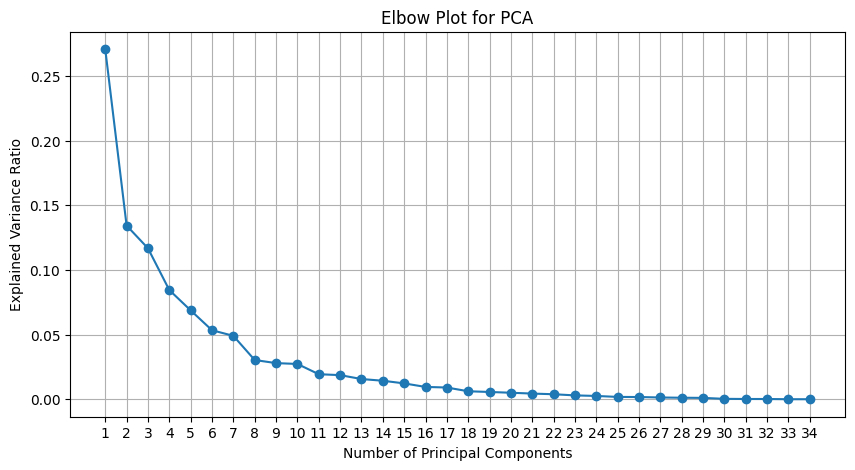

In [22]:
X_train_part = df_joint_train[feature_names_prosody_selected]
X_test_part = df_joint_test[feature_names_prosody_selected]
# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_part)
# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
print("cumulative_variance: ",cumulative_variance.round(4))
# Plotting elbow plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [23]:
#select number of PC based on cumulative_variance & elbow point in the Scree plot
nPC = 7 
pca = PCA(n_components=nPC)
X_pca = pca.fit_transform(X_scaled)

# to test PC V.S. selected features X_part , X_pca
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

X_test_pca = pca.transform(scaler.transform(X_test_part))
clf = RandomForestClassifier()

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

print("all selected features: ", classification_report(y_test_s, clf.fit(X_train_part , y_train_s).predict(X_test_part)))
print(f"{nPC} selected PC components: ", classification_report(y_test_s, clf.fit(X_pca , y_train_s).predict(X_test_pca)))

all selected features:                precision    recall  f1-score   support

          -1       0.76      0.96      0.85       748
           0       0.79      0.48      0.59       183
           1       0.87      0.45      0.59       249

    accuracy                           0.77      1180
   macro avg       0.81      0.63      0.68      1180
weighted avg       0.79      0.77      0.75      1180

7 selected PC components:                precision    recall  f1-score   support

          -1       0.74      0.94      0.83       748
           0       0.75      0.40      0.52       183
           1       0.78      0.41      0.54       249

    accuracy                           0.74      1180
   macro avg       0.76      0.58      0.63      1180
weighted avg       0.75      0.74      0.72      1180



/Users/bianca/anaconda3/envs/tensorflow-gpu/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


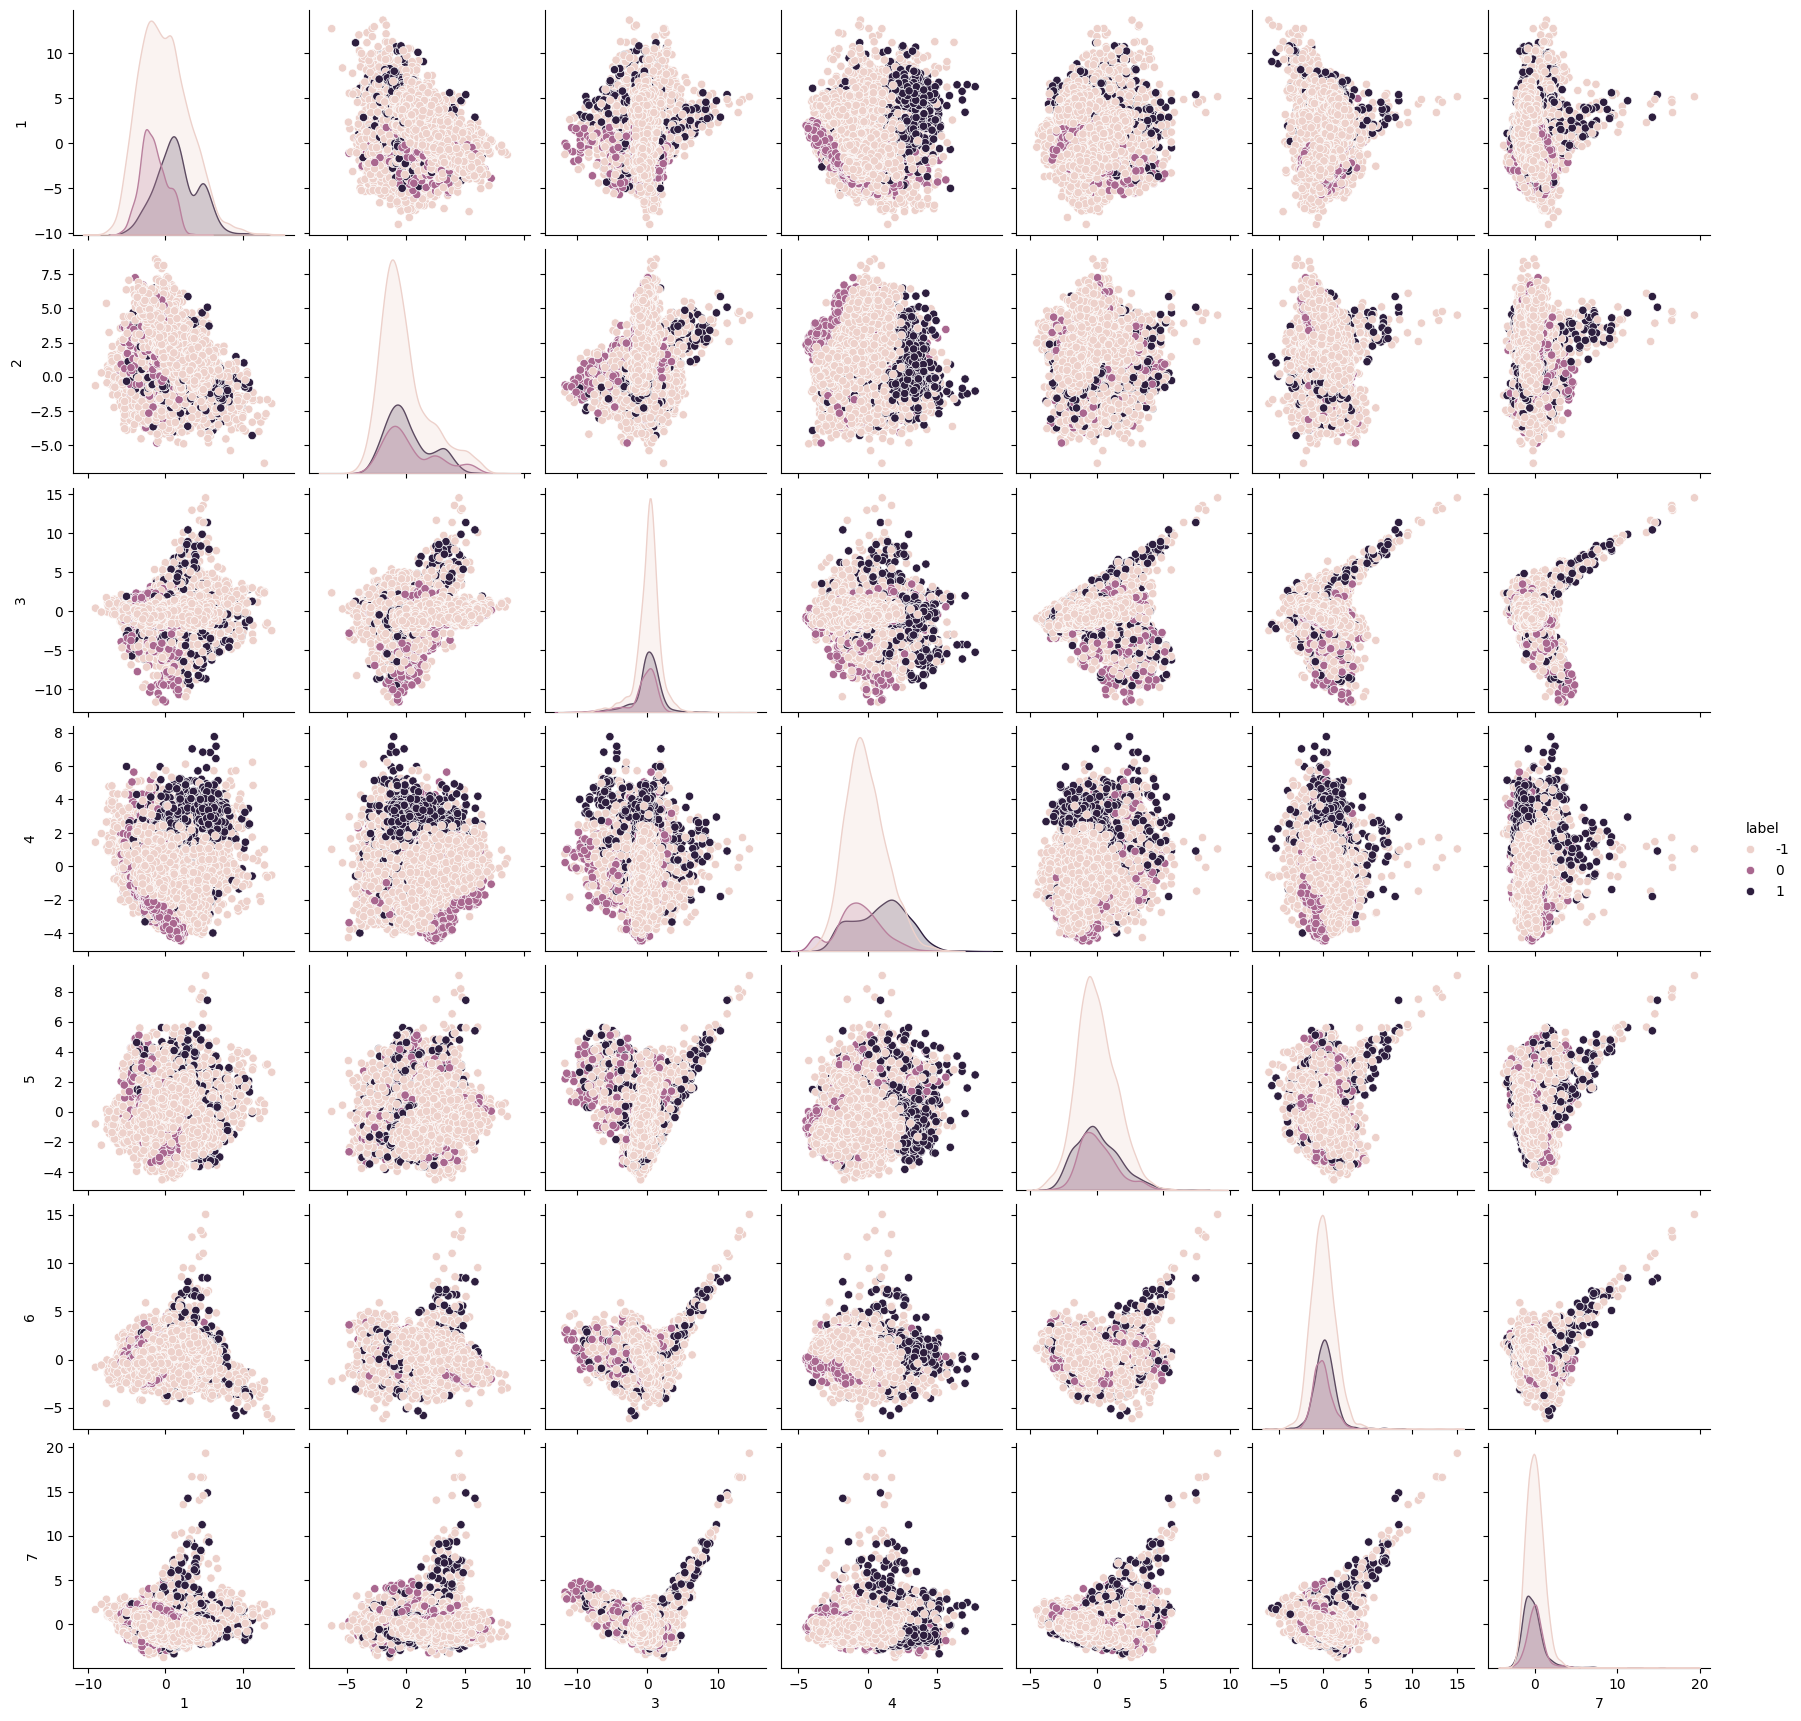

In [26]:
import seaborn as sns
pca = PCA(n_components=7)

X_pca = pca.fit_transform(X_scaled)
# Create a DataFrame for easier visualization
df_pca = pd.DataFrame(data=X_pca, columns=range(1,8))
df_pca['label'] = y_train_s
sns.pairplot(df_pca, hue="label")

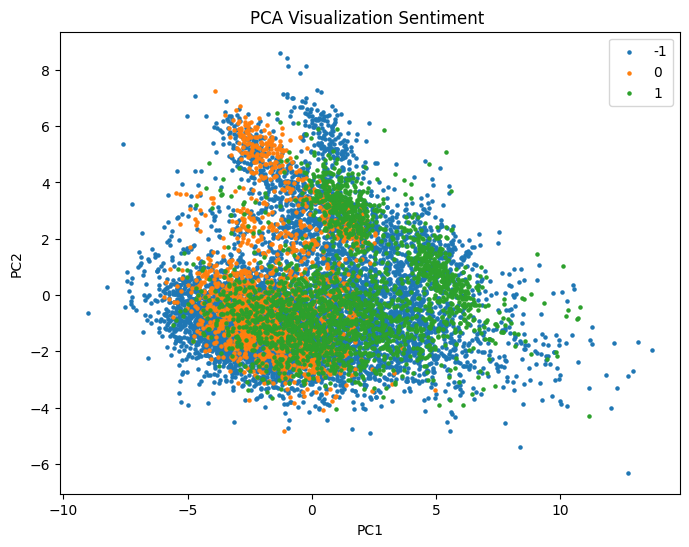

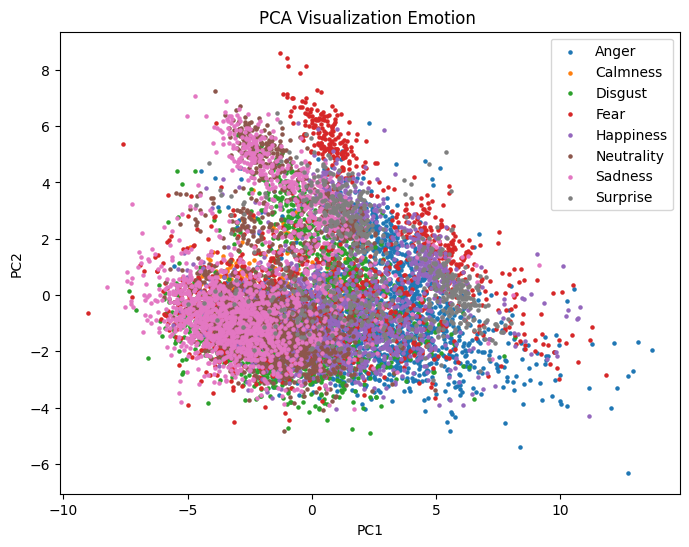

In [34]:
# Visualize PCA results - first 2PC 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
plot_LDA_or_PCA(df_pca,y_train_s,'PC1', 'PC2', 'PCA')
plot_LDA_or_PCA(df_pca,y_train_e,'PC1', 'PC2', 'PCA')

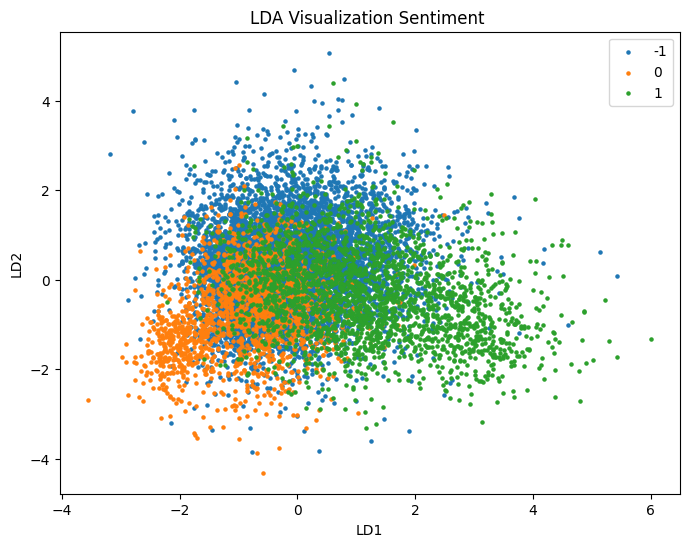

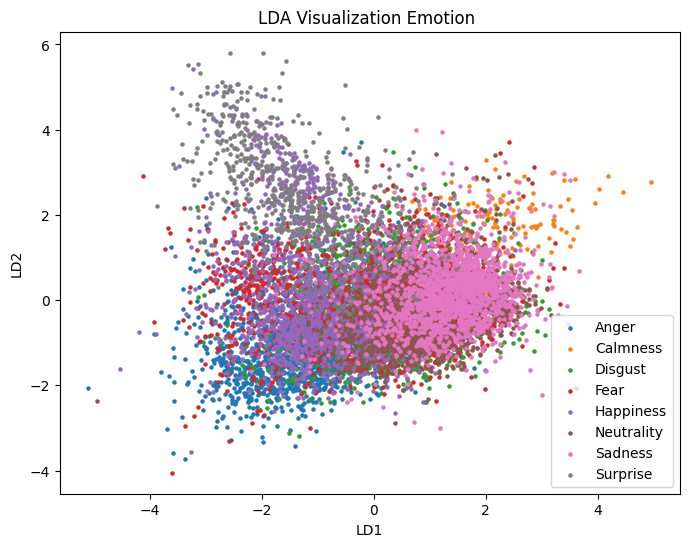

In [32]:
# Perform LDA Linear Discriminant Analysis 
lda = LDA(n_components=2)  # Reduce to 2 components for visualization
X_lda = lda.fit_transform(X_scaled, y_train_s)

# Create a DataFrame for easier visualization
df_lda = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])
plot_LDA_or_PCA(df_lda,y_train_s,'LD1', 'LD2','LDA')


X_lda = lda.fit_transform(X_scaled, y_train_e)
df_lda = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])
plot_LDA_or_PCA(df_lda,y_train_e,'LD1', 'LD2','LDA')


# End

### Feature Tables Part 2 

| feature category   | num of sub attributes  |
| ------------------ | ---------------------- |
|Intensity           |    9                   |
|pitch               |   12                   |
|HNR                 |    6                   |
|GNE                 |    5                   |
|Local Jitter        |    1                   |
|Local Shimmer       |    1                   |
|Spectrum            |    9                   | 
|formant             |   14                   |